In [13]:
# %load example_correlation.py
import h5py
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import glob
# seed random number generator

def moving_avg(dt, n=8):
    return dt.rolling(n).mean()

In [14]:


cwd = os.getcwd()

print(glob.glob(cwd + '/competitionfiles/*.hdf'))
#Open the data file
filepath = cwd + '/competitionfiles/COOLCAT_20091219_074253_24_20091219_074253_240.hdf'
f = h5py.File(filepath, 'r')



df = pd.Series(np.array(h5py.File(filepath)['DYNAMIC DATA']['ch_1']['MEASURED']).byteswap().newbyteorder())
df2 = pd.Series(np.array(h5py.File(filepath)['DYNAMIC DATA']['ch_2']['MEASURED']).byteswap().newbyteorder())

# print(df.describe())
# print(df2.describe())
#Show all channels available in file



['C:\\Users\\Kishan Patel\\Documents\\CAT\\CATProject/competitionfiles\\COOLCAT_20091219_074253_24_20091219_074253_240.hdf', 'C:\\Users\\Kishan Patel\\Documents\\CAT\\CATProject/competitionfiles\\COOLCAT_20091220_103626_08_20091220_103626_080.hdf', 'C:\\Users\\Kishan Patel\\Documents\\CAT\\CATProject/competitionfiles\\COOLCAT_20091221_080624_88_20091221_080624_880.hdf', 'C:\\Users\\Kishan Patel\\Documents\\CAT\\CATProject/competitionfiles\\COOLCAT_20091221_155243_92_20091221_155243_920.hdf', 'C:\\Users\\Kishan Patel\\Documents\\CAT\\CATProject/competitionfiles\\COOLCAT_20091222_164214_64_20091222_164214_640.hdf', 'C:\\Users\\Kishan Patel\\Documents\\CAT\\CATProject/competitionfiles\\COOLCAT_20091223_152439_96_20091223_152439_960.hdf', 'C:\\Users\\Kishan Patel\\Documents\\CAT\\CATProject/competitionfiles\\COOLCAT_20091227_194103_36_20091227_194103_360.hdf', 'C:\\Users\\Kishan Patel\\Documents\\CAT\\CATProject/competitionfiles\\COOLCAT_20091228_155243_84_20091228_155243_840.hdf', 'C:\\Us

In [7]:
chanIDs = f['DYNAMIC DATA']
mean_of_channels={}
nonZeroChannel = []
for channel in chanIDs.keys():
    mean_of_channels[channel]=(np.array(chanIDs[channel]['MEASURED']).mean())
    if mean_of_channels[channel] != 0.0:
        nonZeroChannel.append(channel)
        
print(mean_of_channels)
print(nonZeroChannel)

{'ch_1': 466.31485, 'ch_10': 181.81042, 'ch_100': 359.3362, 'ch_101': 127.99496, 'ch_102': 135050220.0, 'ch_103': 32.527065, 'ch_104': -107.493355, 'ch_105': 7.7660513, 'ch_106': 8.030904, 'ch_107': 0.0, 'ch_108': -154.49043, 'ch_109': 2520.812, 'ch_11': 3593.6633, 'ch_110': 8.054341, 'ch_111': 10.361705, 'ch_112': 0.0, 'ch_13': 4732.812, 'ch_14': 10600.255, 'ch_15': 0.0, 'ch_16': 0.0, 'ch_17': 0.0, 'ch_177': 87.87992, 'ch_178': 9.650712, 'ch_179': 9.667919, 'ch_18': 0.0028811146, 'ch_181': 0.0, 'ch_184': 129.1582, 'ch_185': 255.98991, 'ch_186': 129.33035, 'ch_187': 255.98991, 'ch_19': 3.4184425, 'ch_198': 35.787766, 'ch_199': 383.98486, 'ch_2': 0.0, 'ch_20': 0.0, 'ch_200': -383.98486, 'ch_21': 0.0, 'ch_218': 53.511436, 'ch_22': 0.0, 'ch_226': 347766.66, 'ch_23': 0.0, 'ch_24': 0.0, 'ch_25': 0.0, 'ch_257': 182776.84, 'ch_258': 8119.775, 'ch_26': 0.0, 'ch_261': 97.7022, 'ch_262': 0.0, 'ch_263': 0.0, 'ch_264': 0.0, 'ch_266': 11139.592, 'ch_267': 127.9964, 'ch_27': 0.0, 'ch_28': 0.0, 'ch_2

In [10]:

channels = {}
channelsWithMovingAvg = {}
channelCols = []

for chan in nonZeroChannel:
    channels[chan] = np.array(h5py.File(filepath)['DYNAMIC DATA'][chan]['MEASURED']).tolist()
    srieschannel=pd.DataFrame(channels[chan])
    srieschannel=moving_avg(srieschannel,64)
    channelsWithMovingAvg[chan+'_mv_avg'] = srieschannel.values.tolist()
    #channelCols.append(chan)
    #channelsCols.append(chan+'_mv_avg')
    
#print(channelsWithMovingAvg )


In [15]:
big_df = pd.DataFrame(channelsWithMovingAvg)

print(big_df.columns)

Index(['ch_1_mv_avg', 'ch_10_mv_avg', 'ch_100_mv_avg', 'ch_101_mv_avg',
       'ch_102_mv_avg', 'ch_103_mv_avg', 'ch_104_mv_avg', 'ch_105_mv_avg',
       'ch_106_mv_avg', 'ch_108_mv_avg',
       ...
       'ch_9_mv_avg', 'ch_90_mv_avg', 'ch_91_mv_avg', 'ch_93_mv_avg',
       'ch_94_mv_avg', 'ch_95_mv_avg', 'ch_96_mv_avg', 'ch_97_mv_avg',
       'ch_98_mv_avg', 'ch_99_mv_avg'],
      dtype='object', length=109)


MemoryError: 

In [ ]:
#Plot a sample dataset
ChannelNameA = 'ch_1'
ChannelNameB = 'ch_2'
dset1 = chanIDs[ChannelNameA]['MEASURED']
dset2 = chanIDs[ChannelNameB]['MEASURED']

print(dset1.shape)
corr, _ = pearsonr(dset1, dset2)
print('Pearsons correlation: %.3f' % corr)


#Plot a sample dataset
plt.plot(np.arange(len(dset1[()])), dset1[()],np.arange(len(dset2[()])),dset2[()]) # plotting by columnsplt.title("plot of ch1")
plt.xlabel("Datapoint #")
plt.ylabel("Value")
plt.show()


#Close the file
f.close()

Channels available in this data file
['ch_0', 'ch_1', 'ch_10', 'ch_100', 'ch_101', 'ch_102', 'ch_103', 'ch_104', 'ch_105', 'ch_106', 'ch_107', 'ch_108', 'ch_109', 'ch_11', 'ch_110', 'ch_111', 'ch_112', 'ch_113', 'ch_114', 'ch_115', 'ch_116', 'ch_117', 'ch_118', 'ch_119', 'ch_12', 'ch_120', 'ch_121', 'ch_122', 'ch_123', 'ch_124', 'ch_125', 'ch_126', 'ch_127', 'ch_128', 'ch_129', 'ch_13', 'ch_130', 'ch_131', 'ch_132', 'ch_133', 'ch_134', 'ch_135', 'ch_136', 'ch_137', 'ch_138', 'ch_139', 'ch_14', 'ch_140', 'ch_141', 'ch_15', 'ch_16', 'ch_17', 'ch_18', 'ch_19', 'ch_2', 'ch_20', 'ch_21', 'ch_22', 'ch_23', 'ch_24', 'ch_25', 'ch_26', 'ch_27', 'ch_28', 'ch_29', 'ch_3', 'ch_30', 'ch_31', 'ch_32', 'ch_33', 'ch_34', 'ch_35', 'ch_36', 'ch_37', 'ch_38', 'ch_39', 'ch_4', 'ch_40', 'ch_41', 'ch_42', 'ch_43', 'ch_44', 'ch_45', 'ch_46', 'ch_47', 'ch_48', 'ch_49', 'ch_5', 'ch_50', 'ch_51', 'ch_52', 'ch_53', 'ch_54', 'ch_55', 'ch_56', 'ch_57', 'ch_58', 'ch_59', 'ch_6', 'ch_60', 'ch_61', 'ch_62', 'ch_63', 

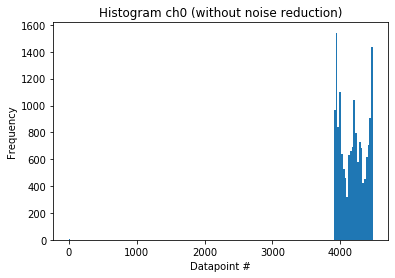

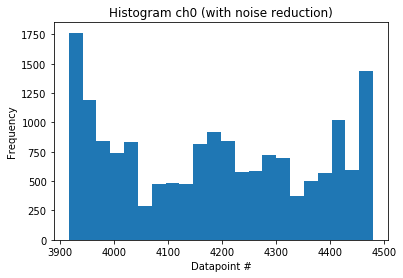

In [16]:
# %load example_histogram.py
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
cwd = os.getcwd()

#Open the data file
filepath = cwd + '/demo.hdf'
f = h5py.File(filepath, 'r')

#Show all channels available in file
chanIDs = f['DYNAMIC DATA']

print("Channels available in this data file")
print(list(chanIDs.keys()))

#Plot a sample dataset
ChannelName = 'ch_0'
dset = chanIDs[ChannelName]['MEASURED']
plt.hist(dset, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram ch0 (without noise reduction)")
plt.xlabel("Datapoint #")
plt.ylabel("Frequency")
plt.show()

'''print("Max of dataset: " + str(max(dset)))
print("Min of dataset: " + str(min(dset)))'''

# Determined that initial 0 values are noise because of .....???
# They may not be noise. They may be noise. You may need to make your own determination of what is and isn't noise
# How do you determine what's noise? Great question! The answer is.....
plt.hist(dset[6:-1], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram ch0 (with noise reduction)")
plt.xlabel("Datapoint #")
plt.ylabel("Frequency")
plt.show()

'''print("Max of dataset (wo noise): " + str(max(dset[6:-1])))
print("Min of dataset (wo noise): " + str(min(dset[6:-1])))'''

#Close the file
f.close()

Channels available in this data file
['ch_0', 'ch_1', 'ch_10', 'ch_100', 'ch_101', 'ch_102', 'ch_103', 'ch_104', 'ch_105', 'ch_106', 'ch_107', 'ch_108', 'ch_109', 'ch_11', 'ch_110', 'ch_111', 'ch_112', 'ch_113', 'ch_114', 'ch_115', 'ch_116', 'ch_117', 'ch_118', 'ch_119', 'ch_12', 'ch_120', 'ch_121', 'ch_122', 'ch_123', 'ch_124', 'ch_125', 'ch_126', 'ch_127', 'ch_128', 'ch_129', 'ch_13', 'ch_130', 'ch_131', 'ch_132', 'ch_133', 'ch_134', 'ch_135', 'ch_136', 'ch_137', 'ch_138', 'ch_139', 'ch_14', 'ch_140', 'ch_141', 'ch_15', 'ch_16', 'ch_17', 'ch_18', 'ch_19', 'ch_2', 'ch_20', 'ch_21', 'ch_22', 'ch_23', 'ch_24', 'ch_25', 'ch_26', 'ch_27', 'ch_28', 'ch_29', 'ch_3', 'ch_30', 'ch_31', 'ch_32', 'ch_33', 'ch_34', 'ch_35', 'ch_36', 'ch_37', 'ch_38', 'ch_39', 'ch_4', 'ch_40', 'ch_41', 'ch_42', 'ch_43', 'ch_44', 'ch_45', 'ch_46', 'ch_47', 'ch_48', 'ch_49', 'ch_5', 'ch_50', 'ch_51', 'ch_52', 'ch_53', 'ch_54', 'ch_55', 'ch_56', 'ch_57', 'ch_58', 'ch_59', 'ch_6', 'ch_60', 'ch_61', 'ch_62', 'ch_63', 

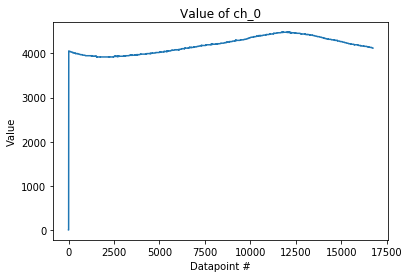

In [13]:
# %load example_plotting.py
import h5py
import os
import matplotlib.pyplot as plt
cwd = os.getcwd()

#Open the data file
filepath = cwd + '/competitionfiles/COOLCAT_20091219_074253_24_20091219_074253_240.hdf'
f = h5py.File(filepath, 'r')


#Show all channels available in file
chanIDs = f['DYNAMIC DATA']

print("Channels available in this data file")
print(list(chanIDs.keys()))



#Plot a sample dataset
ChannelName = 'ch_0'
dset = chanIDs[ChannelName]['MEASURED']
plt.plot(dset[()]) # plotting by columns
plt.title("Value of " + ChannelName)
plt.xlabel("Datapoint #")
plt.ylabel("Value")
plt.show()

#Close the file
f.close()

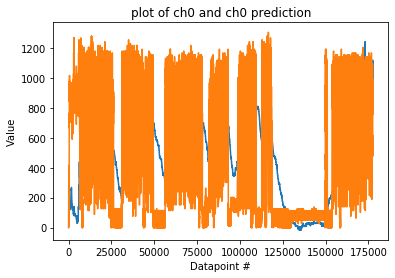

Mean Absolute Error : 325.79443


In [57]:
# %load example_prediction.py
import h5py
import os
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import pearsonr
# seed random number generator

cwd = os.getcwd()

#Open the data file
filepath = cwd + '/competitionfiles/COOLCAT_20091219_074253_24_20091219_074253_240.hdf'
f = h5py.File(filepath, 'r')


#Show all channels available in file
chanIDs = f['DYNAMIC DATA']

#Plot a sample dataset
ChannelNameA = 'ch_1'
ChannelNameB = 'ch_10'
dset1 = chanIDs[ChannelNameA]['MEASURED']
dset2 = chanIDs[ChannelNameB]['MEASURED']

#Attempting to predict channel 0 with channel 10's data
# Try to predict by multiply by pi???
dset1_prediction = dset2[()] * np.pi


#Plot a sample dataset
plt.plot(np.arange(len(dset1[()])), dset1[()],np.arange(len(dset1_prediction)),dset1_prediction) # plotting by columns
plt.title("plot of ch0 and ch0 prediction")
plt.xlabel("Datapoint #")
plt.ylabel("Value")
plt.show()

error = np.mean(abs(dset1 - dset1_prediction))
print("Mean Absolute Error : " + str(error))

#Close the file
f.close()

In [56]:
import h5py
import os
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import pearsonr
# seed random number generator

cwd = os.getcwd()

#Open the data file
filepath = cwd + '/competitionfiles/COOLCAT_20091219_074253_24_20091219_074253_240.hdf'
f = h5py.File(filepath, 'r')


#Show all channels available in file
chanIDs = f['DYNAMIC DATA']
list_of_all_ch7
for channel_Id in chanIDS.keys() 
